In [12]:
import numpy as np
import pandas as pd

In [14]:
data = pd.read_csv("/content/drive/MyDrive/project/data/noop_pred.csv")
data.head()

,Unnamed: 0,features,label,rawPrediction,probability,prediction
0,0,"(90,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...",0,"[17.00958885112753,2.9904111488724743]","[0.8504794425563763,0.1495205574436237]",0.0
1,1,"(90,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...",0,"[17.14881357665305,2.851186423346951]","[0.8574406788326524,0.1425593211673475]",0.0
2,2,"(90,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...",0,"[17.14881357665305,2.851186423346951]","[0.8574406788326524,0.1425593211673475]",0.0
3,3,"(90,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...",1,"[14.5046805847331,5.4953194152668985]","[0.725234029236655,0.2747659707633449]",0.0
4,4,"(90,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...",0,"[14.538637341629014,5.4613626583709864]","[0.7269318670814507,0.2730681329185493]",0.0


In [18]:
data['repeatProbability'] = data.probability.str.split(',').str.get(1).str.replace(']','')
data.head()

,Unnamed: 0,features,label,rawPrediction,probability,prediction,repeatProbability
0,0,"(90,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...",0,"[17.00958885112753,2.9904111488724743]","[0.8504794425563763,0.1495205574436237]",0.0,0.1495205574436237
1,1,"(90,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...",0,"[17.14881357665305,2.851186423346951]","[0.8574406788326524,0.1425593211673475]",0.0,0.1425593211673475
2,2,"(90,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...",0,"[17.14881357665305,2.851186423346951]","[0.8574406788326524,0.1425593211673475]",0.0,0.1425593211673475
3,3,"(90,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...",1,"[14.5046805847331,5.4953194152668985]","[0.725234029236655,0.2747659707633449]",0.0,0.2747659707633449
4,4,"(90,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...",0,"[14.538637341629014,5.4613626583709864]","[0.7269318670814507,0.2730681329185493]",0.0,0.2730681329185493


In [19]:
df = pd.read_csv("/content/drive/MyDrive/project/data/all_features_test_OneHot.csv")
df.head()
df['id']

0           12262064
1           12277270
2           12332190
3           12524696
4           13074629
             ...    
151479    4843417324
151480    4847628950
151481    4847787712
151482    4853460972
151483    4853598737
Name: id, Length: 151484, dtype: int64

In [7]:
x = pd.concat([df['id'], data['repeatProbability']], axis = 1)
x.head()
x.to_csv('/content/drive/MyDrive/project/data/predcsv/t1_pred_TOKAGGLE.csv')

In [ ]:
list(x['repeatProbability'])

# **ROC CURVE**

In [15]:
import numpy as np

In [20]:
y_pred = np.array(list(data['repeatProbability']), dtype = 'float64')
y_true = np.array(list(data['label']), dtype = 'float64')

In [21]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold= roc_curve(y_score = y_pred, y_true = y_true)
auc = auc(fpr, tpr)

print('AUC: {:.3f}'.format(auc))

AUC: 0.695


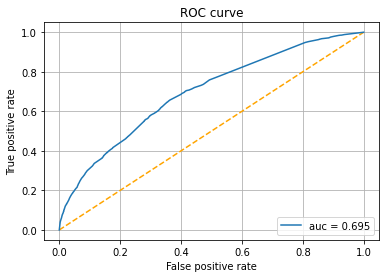

In [22]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot([0,1], [0,1], 'k--', color='orange')
plt.plot(fpr, tpr, label='auc = {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()